## Predictive Analysis

In [1]:
import numpy as np
import seaborn as sns
import scipy
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Feacture Selection

In [3]:
df = pd.read_csv('D:\HKU\STAT4710\dataset_cleaned.csv')
df['UCR_PART'] = df['UCR_PART'].astype('category')
df['UCR_PART'] = df['UCR_PART'].cat.codes
df.head()

,Block,Primary Type,District,Ward,Community Area,Year,Latitude,Longitude,UCR_PART,Month,Day,Time,Weekday
0,035XX S INDIANA AVE,THEFT,2.0,3.0,35.0,2020,41.830482,-87.621752,0,5,7,Late Morning,Thursday
1,005XX W 32ND ST,BATTERY,9.0,11.0,60.0,2020,41.836310,-87.639624,0,4,16,Early Morning,Thursday
2,081XX S COLES AVE,ASSAULT,4.0,7.0,46.0,2020,41.747610,-87.549179,0,7,1,Late Morning,Wednesday
3,065XX S WOLCOTT AVE,BATTERY,7.0,15.0,67.0,2020,41.774878,-87.671375,0,9,27,Night,Sunday
4,081XX S LOOMIS BLVD,WEAPONS VIOLATION,6.0,21.0,71.0,2020,41.746221,-87.658477,1,8,4,Night,Tuesday


In [4]:
df = df.drop(['Block', 'Primary Type', 'Ward'], axis=1)
df.head()

,District,Community Area,Year,Latitude,Longitude,UCR_PART,Month,Day,Time,Weekday
0,2.0,35.0,2020,41.830482,-87.621752,0,5,7,Late Morning,Thursday
1,9.0,60.0,2020,41.836310,-87.639624,0,4,16,Early Morning,Thursday
2,4.0,46.0,2020,41.747610,-87.549179,0,7,1,Late Morning,Wednesday
3,7.0,67.0,2020,41.774878,-87.671375,0,9,27,Night,Sunday
4,6.0,71.0,2020,41.746221,-87.658477,1,8,4,Night,Tuesday


#### Focus on "District"

In [ ]:
# only "District" and "UCR_PART"
df_District = df[['District', 'UCR_PART']]

# pandas.get_dummies()
df_District = pd.get_dummies(df_District, columns = ['District'])

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df_District.drop('UCR_PART', axis=1)
y = df_District['UCR_PART']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy  0.7406420665098119
F1 score  0.6303272544266632


#### Focus on "Community Area"

In [ ]:
# only "Community Area" and "UCR_PART"
df_CA = df[['Community Area', 'UCR_PART']]

# pandas.get_dummies()
df_CA = pd.get_dummies(df_CA, columns = ['Community Area'])

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df_CA.drop('UCR_PART', axis=1)
y = df_CA['UCR_PART']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy  0.7406380400046707
F1 score  0.6302800394968827


#### Focus on "Latitude" and "Longitude"

In [ ]:
# only "Latitude", "Longitude" and "UCR_PART"
df_LL = df[['Latitude', 'Longitude', 'UCR_PART']]

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df_LL.drop('UCR_PART', axis=1)
y = df_LL['UCR_PART']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy  0.7284914161621232
F1 score  0.6888585559286998


#### Focus on Time Features

In [ ]:
df_T = df[['Year', 'Month', 'Day', 'Time', 'Weekday', 'UCR_PART']]

# pandas.get_dummies()
df_T = pd.get_dummies(df_T, columns = ['Year', 'Month', 'Day', 'Time', 'Weekday'])

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df_LL.drop('UCR_PART', axis=1)
y = df_LL['UCR_PART']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy  0.7284578619526134
F1 score  0.6888240694851979


#### All Features

In [5]:
from sklearn.preprocessing import LabelEncoder

# Label
labelencoder = LabelEncoder()
df['Year'] = labelencoder.fit_transform(df['Year'])
df['Month'] = labelencoder.fit_transform(df['Month'])
df['Weekday'] = labelencoder.fit_transform(df['Weekday'])
df['Day'] = labelencoder.fit_transform(df['Day'])

# pandas.get_dummies
df = pd.get_dummies(df, columns=['District'])
df = pd.get_dummies(df, columns=['Community Area'])
df = pd.get_dummies(df, columns=['Time'])

df.head()

,Year,Latitude,Longitude,UCR_PART,Month,Day,Weekday,District_1.0,District_2.0,District_3.0,...,Community Area_72.0,Community Area_73.0,Community Area_74.0,Community Area_75.0,Community Area_76.0,Community Area_77.0,Time_Afternoon,Time_Early Morning,Time_Late Morning,Time_Night
0,6,41.830482,-87.621752,0,4,6,4,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,6,41.836310,-87.639624,0,3,15,4,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,6,41.747610,-87.549179,0,6,0,6,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,41.774878,-87.671375,0,8,26,3,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,6,41.746221,-87.658477,1,7,3,5,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

#taking a fraction of data
data_sample = df.sample(frac=0.01, random_state=1)
model = ExtraTreesClassifier()
X = data_sample.drop(['UCR_PART'], axis=1)
y = data_sample['UCR_PART']
model.fit(X, y)

print(model.feature_importances_)

[1.18911907e-01 1.55859513e-01 1.57061169e-01 1.23217126e-01
 1.47839844e-01 1.15734666e-01 1.57832501e-03 1.58045000e-03
 2.13946324e-03 1.94187595e-03 1.68127732e-03 2.46778473e-03
 1.82750030e-03 2.18159669e-03 2.07599034e-03 1.54701718e-03
 6.91427136e-03 1.84355878e-03 1.62664572e-03 1.25501548e-03
 1.29307052e-03 1.56217673e-03 1.49384708e-03 1.69874867e-03
 1.59540789e-03 1.61683994e-03 1.35118998e-03 2.39665602e-03
 2.77350569e-05 8.90721615e-04 1.22223970e-03 1.60999175e-03
 1.28644413e-03 7.37776109e-04 1.18848830e-03 1.33914585e-03
 1.39934050e-03 5.06271711e-04 8.93659493e-04 7.87610880e-04
 6.64296143e-04 9.40218544e-04 1.14599662e-03 1.25968342e-03
 1.12252757e-03 8.73354969e-04 5.58849904e-04 1.43114433e-03
 1.12287701e-03 1.30349561e-03 1.50017964e-03 2.41648130e-03
 1.41606706e-03 2.35954731e-03 2.14309269e-03 1.47425302e-03
 1.85897923e-03 2.36605170e-03 1.13349539e-03 1.13003283e-03
 1.21751132e-03 1.15341957e-03 9.47528106e-04 1.24280773e-03
 8.84430387e-04 8.539248

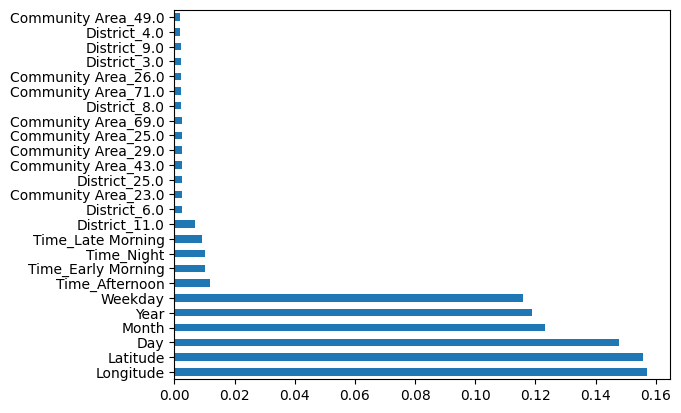

In [ ]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [ ]:
# 把X中的所有False值替换为0，True值替换为1
X = X.fillna(0)
X = X.replace(True, 1)
X = X.replace(False, 0)

X.head()

,Year,Latitude,Longitude,Month,Day,Weekday,District_1.0,District_2.0,District_3.0,District_4.0,...,Community Area_72.0,Community Area_73.0,Community Area_74.0,Community Area_75.0,Community Area_76.0,Community Area_77.0,Time_Afternoon,Time_Early Morning,Time_Late Morning,Time_Night
1704488,3,41.960098,-87.719229,6,12,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1690804,3,41.857987,-87.654319,6,30,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
425556,8,41.935543,-87.642923,1,21,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1137830,1,41.952961,-87.783195,4,16,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444080,6,41.764771,-87.643016,7,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Multicollinearity - VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data.sort_value(by='VIF', ascending=False))

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


AttributeError: 'DataFrame' object has no attribute 'sort_value'

#### Selected Features

In [6]:
df_Final = df[['Latitude', 'Longitude', 'Year', 'Month', 'Day', 'Weekday', 'UCR_PART', 'Time_Afternoon', 'Time_Early Morning', 'Time_Late Morning', 'Time_Night']]
df_Final.head()

,Latitude,Longitude,Year,Month,Day,Weekday,UCR_PART,Time_Afternoon,Time_Early Morning,Time_Late Morning,Time_Night
0,41.830482,-87.621752,6,4,6,4,0,False,False,True,False
1,41.836310,-87.639624,6,3,15,4,0,False,True,False,False
2,41.747610,-87.549179,6,6,0,6,0,False,False,True,False
3,41.774878,-87.671375,6,8,26,3,0,False,False,False,True
4,41.746221,-87.658477,6,7,3,5,1,False,False,False,True


In [ ]:
X = df_Final.drop(['UCR_PART'], axis=1)
X = X.fillna(0)
X = X.replace(True, 1)
X = X.replace(False, 0)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
y = df_Final['UCR_PART']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
pred_train = knn_5.predict(X_train)
y_pred = knn_5.predict(X_test)
print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Test accuracy  0.7829453217438922
Accuracy  0.6987288323269307
F1 score  0.6634575238181736


In [ ]:
# Deploy Elbow method to get optimum number of neighbours
error_rate = []
k_range = range(10,50,5)
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_train = knn.predict(X_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print('Neighbours ',i)
    print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
    print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
    print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Neighbours  10
Test accuracy  0.7562547491226527
Accuracy  0.7305355386054602
F1 score  0.6569795494641048
Neighbours  15
Test accuracy  0.7507476362958655
Accuracy  0.7294416713754407
F1 score  0.6594360380518196
Neighbours  20
Test accuracy  0.7471824508665333
Accuracy  0.7369014432336595
F1 score  0.6504601434524366
Neighbours  25
Test accuracy  0.7457403857049755
Accuracy  0.7364330264689026
F1 score  0.6512387379908917
Neighbours  30
Test accuracy  0.7442246929643671
Accuracy  0.7390354909584828
F1 score  0.6444174367631892
Neighbours  35
Test accuracy  0.7434257186885778
Accuracy  0.738670421159016
F1 score  0.6442567759873784
Neighbours  40
Test accuracy  0.7426819650970763
Accuracy  0.7399723244879963
F1 score  0.6398183852520384
Neighbours  45
Test accuracy  0.7423563931459627
Accuracy  0.7397441558633296
F1 score  0.6397084783956729


Text(0, 0.5, 'Error Rate')

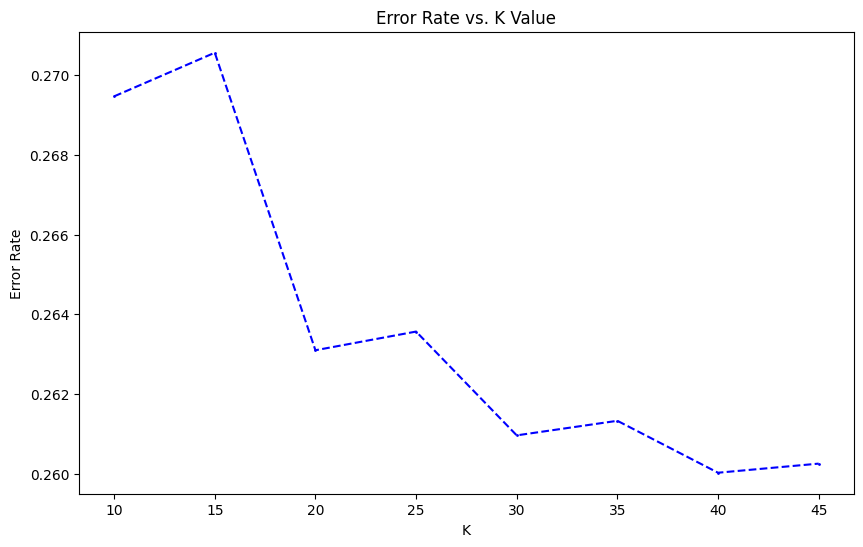

In [ ]:
# Plotting the error rate
plt.figure(figsize=(10,6))

plt.plot(k_range,error_rate, color= 'blue', linestyle= 'dashed', marker= 'o', markerfacecolor='red', markersize=1)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

K = 20, optimum

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_40 = KNeighborsClassifier(n_neighbors=40)
knn_40.fit(X_train, y_train)
pred_train = knn_40.predict(X_train)
y_pred = knn_40.predict(X_test)
print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Test accuracy  0.7426819650970763
Accuracy  0.7399723244879963
F1 score  0.6398183852520384


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_20 = KNeighborsClassifier(n_neighbors=20)
knn_20.fit(X_train, y_train)
pred_train = knn_20.predict(X_train)
y_pred = knn_20.predict(X_test)
print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Test accuracy  0.7471824508665333
Accuracy  0.7369014432336595
F1 score  0.6504601434524366


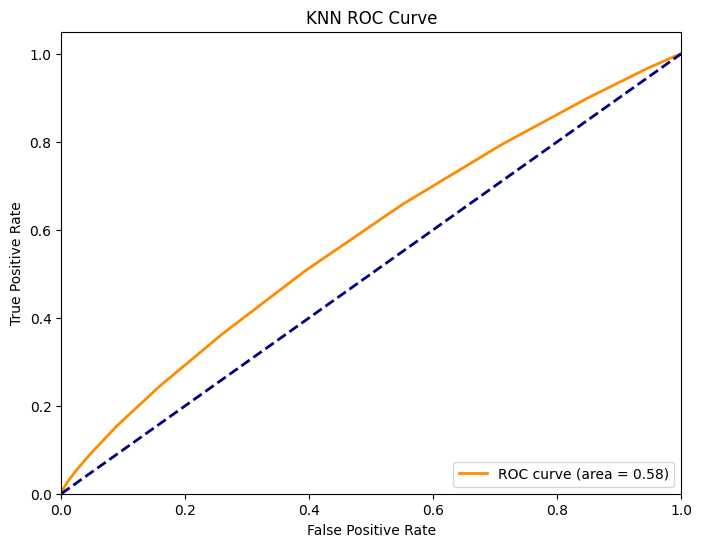

In [ ]:
# 计算 ROC 曲线和 AUC
y_score = knn_20.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
auc = metrics.roc_auc_score(y_test, y_score)

# 绘制 AUROC 图
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.5140892184472982

### KNN - Grid Search/ Random Search

In [ ]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid_params = {
    'weights' : ['uniform', 'distance'],
    'metric' : ['manhattan','jaccard']
}

randomSearch = RandomizedSearchCV(
    KNeighborsClassifier(40),
    grid_params,
    verbose = 1,
    cv = 5,
    random_state = 1
    )

rs_results = randomSearch.fit(X_train, y_train)

c:\Users\ROG\.conda\envs\stat\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy  0.74063535566791
F1 score  0.6302787271255424


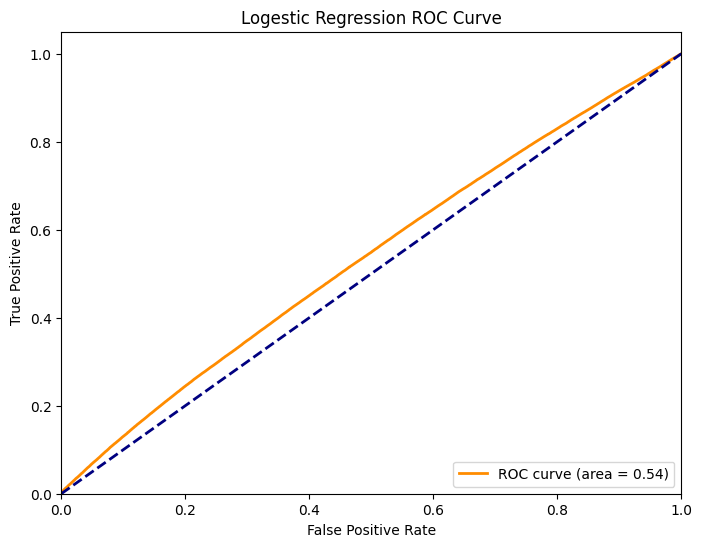

In [ ]:
# 计算 ROC 曲线和 AUC
y_score = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
auc = metrics.roc_auc_score(y_test, y_score)

# 绘制 AUROC 图
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logestic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.5

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Fit decision tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.6457198921433489
F1 score  0.6489965875753376


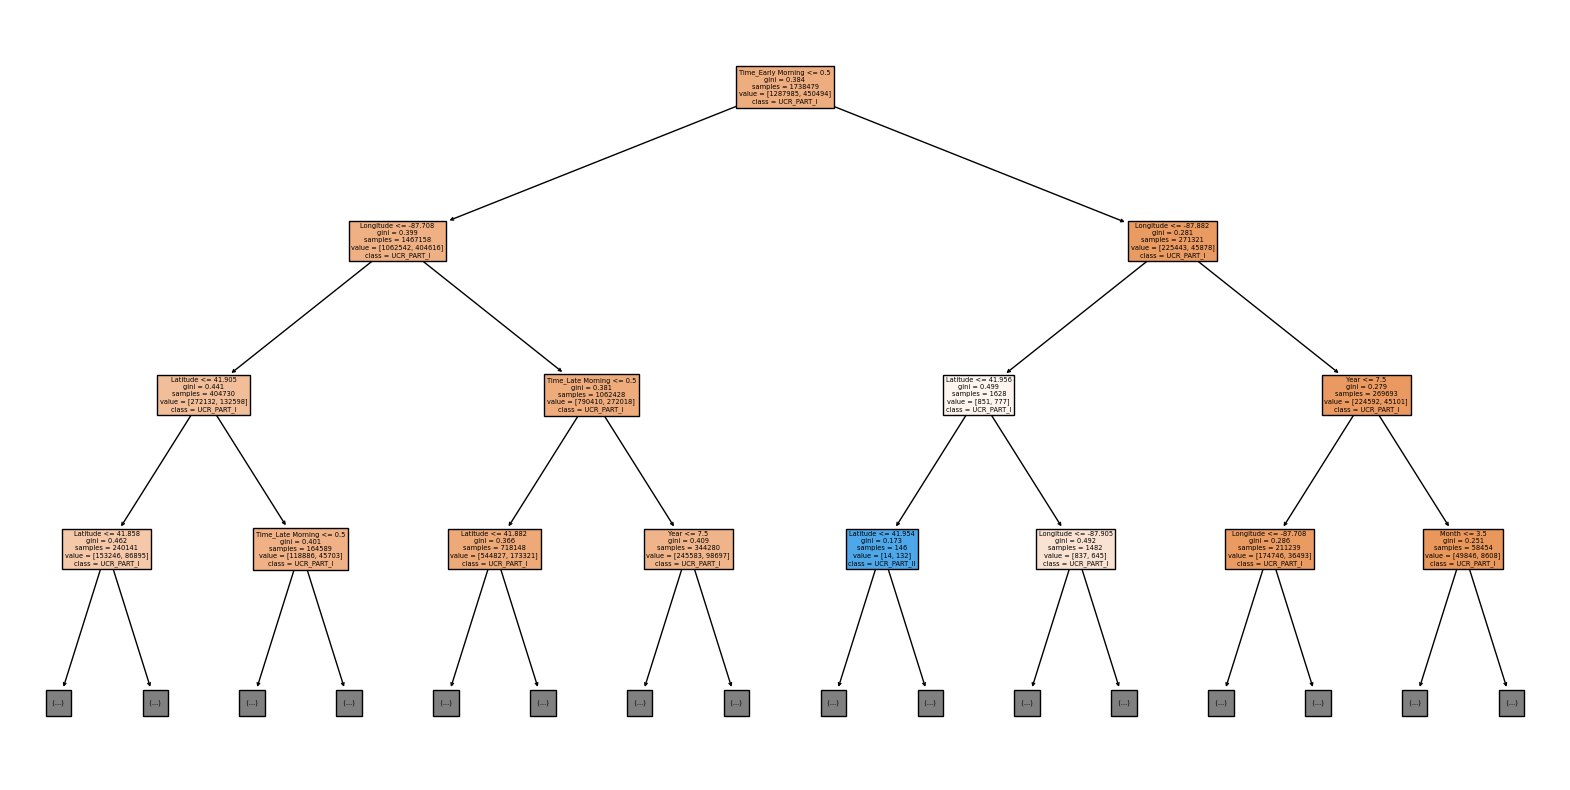

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf, max_depth=3, filled=True, feature_names=X.columns, class_names=['UCR_PART_I', 'UCR_PART_II'])
plt.show()

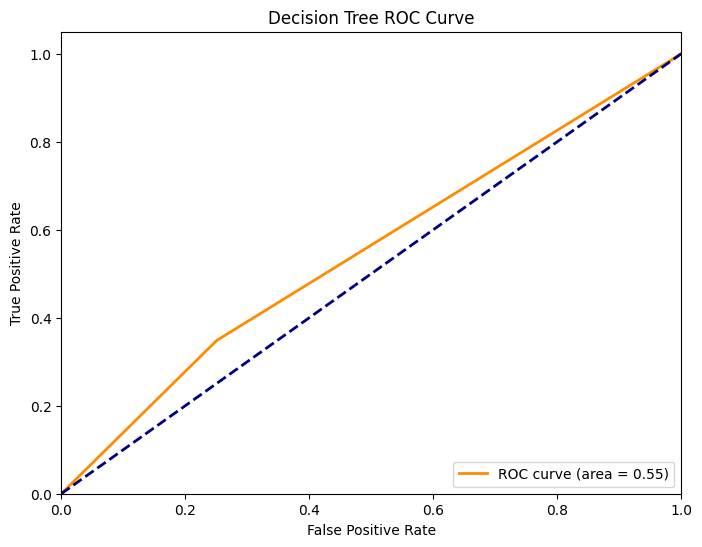

In [ ]:
# 计算 ROC 曲线和 AUC
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
auc = metrics.roc_auc_score(y_test, y_score)

# 绘制 AUROC 图
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.5478061955304088

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7338319041477029
F1 score  0.6811515524660803


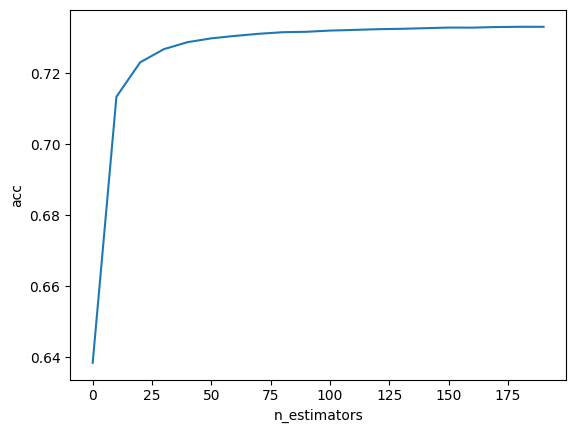

best n_estimators: 181


In [ ]:
# n_estimators

cross = []
for i  in range(0,200,10):
    rf = RandomForestClassifier(n_estimators=i+1, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(0,200,10),cross)
plt.xlabel('n_estimators')
plt.ylabel('acc')
plt.show()
best_n_estimators = np.argmax(cross)*10+1
print('best n_estimators:', best_n_estimators)

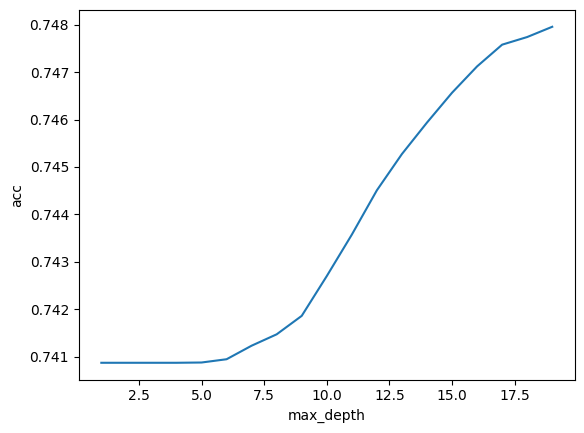

best max_depth: 19


In [ ]:
# max_depth
cross = []
for i  in range(1,20):
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(1,20),cross)
plt.xlabel('max_depth')
plt.ylabel('acc')
plt.show()
best_max_depth = np.argmax(cross)+1
print('best max_depth:', best_max_depth)

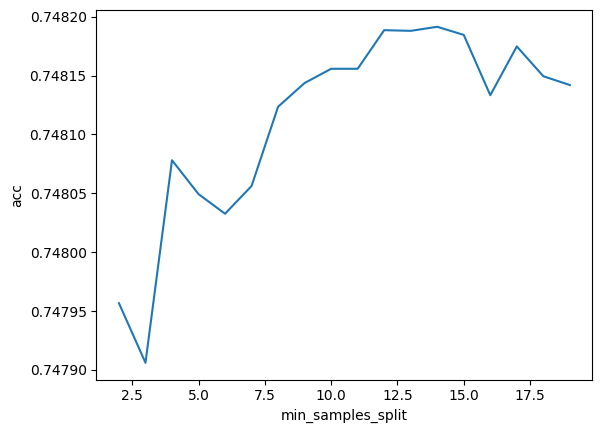

best min_samples_split: 14


In [ ]:
# min_samples_split
cross = []
for i  in range(2,20):
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(2,20),cross)
plt.xlabel('min_samples_split')
plt.ylabel('acc')
plt.show()
best_min_samples_split = np.argmax(cross)+2
print('best min_samples_split:', best_min_samples_split)

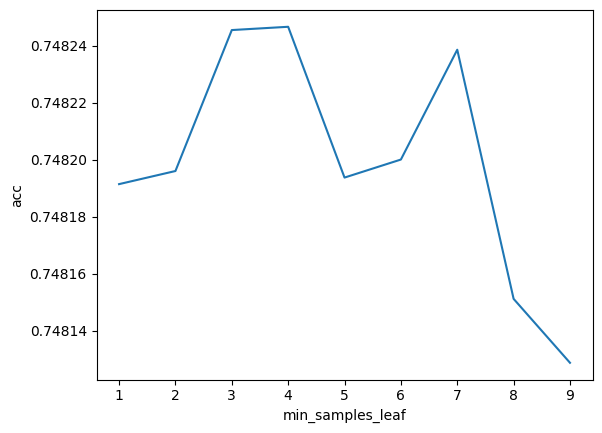

best min_samples_leaf: 4


In [ ]:
# min_samples_leaf
cross = []
for i  in range(1,10):
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(1,10),cross)
plt.xlabel('min_samples_leaf')
plt.ylabel('acc')
plt.show()
best_min_samples_leaf = np.argmax(cross)+1
print('best min_samples_leaf:', best_min_samples_leaf)

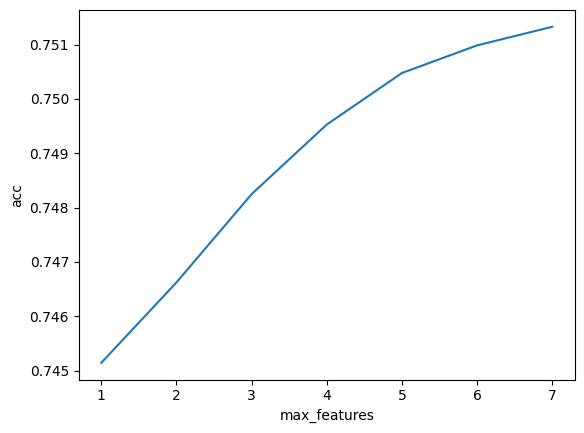

best max_features: 7


In [ ]:
# max_features
cross = []
for i  in range(1,8):
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(1,8),cross)
plt.xlabel('max_features')
plt.ylabel('acc')
plt.show()
best_max_features = np.argmax(cross)+1
print('best max_features:', best_max_features)

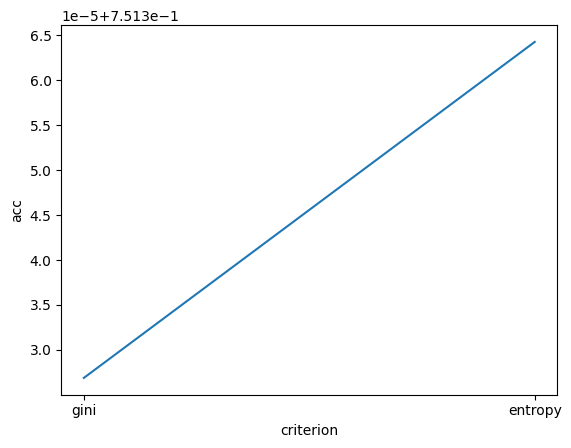

best criterion: entropy


In [ ]:
# criterion
cross = []
for i  in ['gini','entropy']:
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,criterion=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(['gini','entropy'],cross)
plt.xlabel('criterion')
plt.ylabel('acc')
plt.show()
best_criterion = np.argmax(cross)
print('best criterion:', ['gini','entropy'][best_criterion])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=181,max_depth=19,min_samples_split=14,min_samples_leaf=4,max_features=7,criterion='gini', n_jobs=-1,random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))
print('ROC AUC score ', roc_auc_score(y_test, y_pred))

Accuracy  0.7523296687662654
F1 score  0.6731532264956153
ROC AUC score  0.5361480866353872


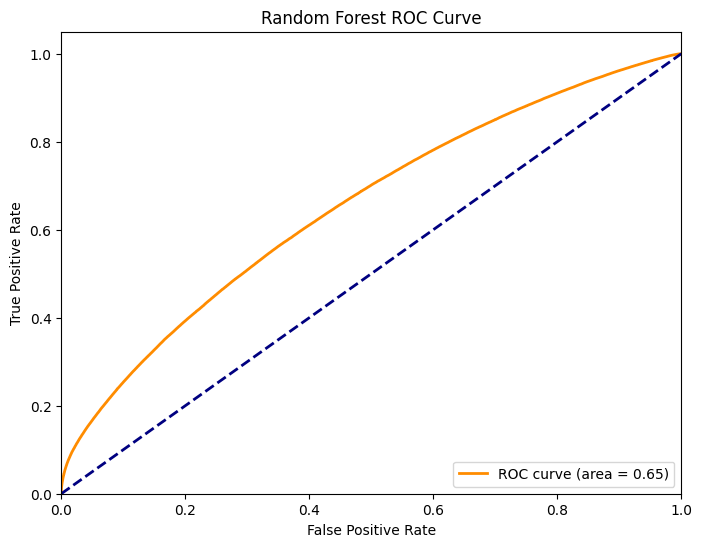

In [ ]:
# 计算 ROC 曲线和 AUC
y_score = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
auc = metrics.roc_auc_score(y_test, y_score)

# 绘制 AUROC 图
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

best_max_features = 7
best_min_samples_leaf = 4
best_min_samples_split = 14
best_max_depth = 19
best_n_estimators = 181
best_criterion = 'gini'

### Oversmapling - SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Oversample 'Minority'
sm = SMOTE(sampling_strategy='minority', random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

target_count = y_train_res.value_counts()
print(target_count)

UCR_PART
0    1287985
1    1287985
Name: count, dtype: int64


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,criterion='gini', n_jobs=-1,random_state=1)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.6262316072600572
F1 score  0.6452340491975268


In [15]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.5913811507272391

Oversampling the Minority classes do not help with an increase in accuracy and F1 score

### Undersampling - Cluster Centroids

In [16]:
from imblearn.under_sampling import ClusterCentroids

# Undersample 'Majority'
cc = ClusterCentroids(sampling_strategy='majority', random_state=1)
X_train_res, y_train_res = cc.fit_resample(X_train, y_train)
target_count = y_train_res.value_counts()
print(target_count)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,criterion='gini', n_jobs=-1,random_state=1)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

"from sklearn.ensemble import RandomForestClassifier\n\nrf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,criterion=['gini','entropy'][best_criterion], n_jobs=-1,random_state=1)\nrf.fit(X_train_res, y_train_res)\ny_pred = rf.predict(X_test)\nprint('Accuracy ', metrics.accuracy_score(y_test, y_pred))\nprint('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))"

Undersampling the Majority classes do not help with an increase in accuracy and F1 score

### Random Oversampling

In [17]:
from imblearn.over_sampling import RandomOverSampler

# Oversample 'Minority'
ros = RandomOverSampler(sampling_strategy='minority', random_state=1)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
target_count = y_train_res.value_counts()
print(target_count)

UCR_PART
0    1287985
1    1287985
Name: count, dtype: int64


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,criterion='gini', n_jobs=-1,random_state=1)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.64842838793498
F1 score  0.6635917711985724


### Random Undersampling

In [22]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample 'Majority'
rus = RandomUnderSampler(sampling_strategy='majority', random_state=1)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
target_count = y_train_res.value_counts()
print(target_count)

UCR_PART
0    450494
1    450494
Name: count, dtype: int64


In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,criterion='gini', n_jobs=-1,random_state=1)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.6055232913189892
F1 score  0.6292031961616154


## PCA

In [ ]:
df_pca = pd.concat([X, y], axis=1)
df_pca.head()

,Latitude,Longitude,Year,Month,Day,Weekday,Time_Afternoon,Time_Early Morning,Time_Late Morning,Time_Night,UCR_PART
0,41.830482,-87.621752,6,4,6,4,0,0,1,0,0
1,41.836310,-87.639624,6,3,15,4,0,1,0,0,0
2,41.747610,-87.549179,6,6,0,6,0,0,1,0,0
3,41.774878,-87.671375,6,8,26,3,0,0,0,1,0
4,41.746221,-87.658477,6,7,3,5,0,0,0,1,1


In [ ]:
# 使用PCA进行特征选择
from bu import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

df_PCA = pd.concat([principalDf, df_pca[['UCR_PART']]], axis = 1)
df_PCA.head()

,principal component 1,principal component 2,UCR_PART
0,-8.660276,1.567574,0
1,0.341244,2.553287,0
2,-14.662562,-0.423444,0
3,11.335432,-2.457182,0
4,-11.663232,-1.428950,1


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


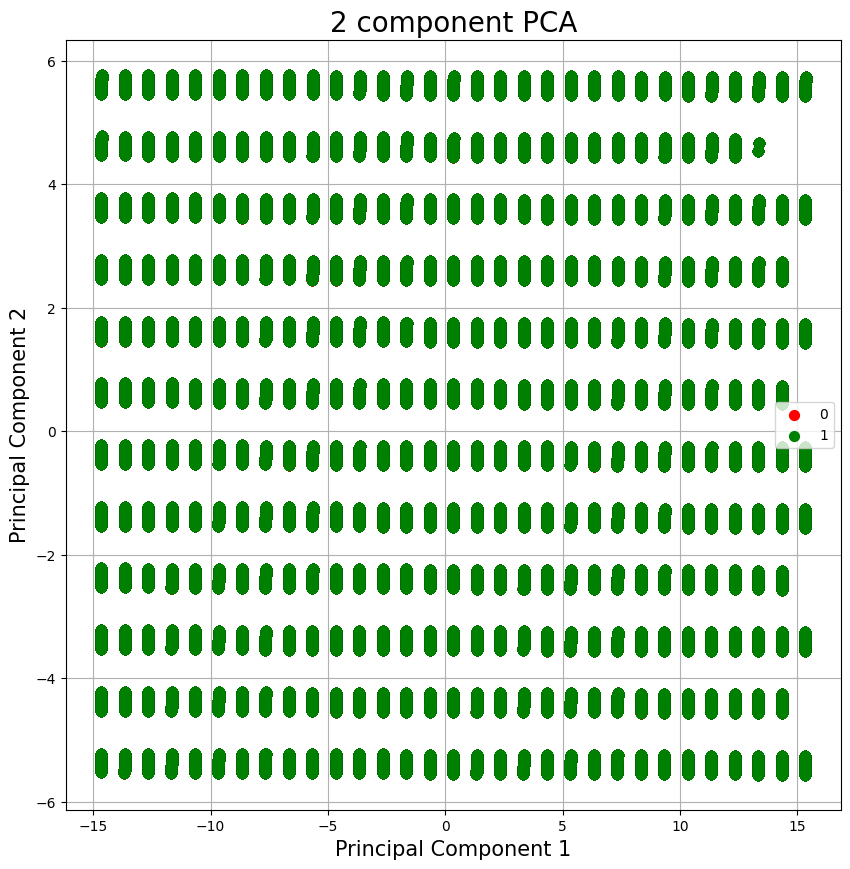

In [ ]:
# PCA的散点图
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_PCA['UCR_PART'] == target
    ax.scatter(df_PCA.loc[indicesToKeep, 'principal component 1'], df_PCA.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
from sklearn.model_selection import train_test_split
y = df_PCA['UCR_PART']
X = df_PCA.drop(['UCR_PART'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Dicision Tree with PCA

In [ ]:
# Decision Tree with PCA
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.640399536683475
F1 score  0.639094797598702


## Random Forest with PCA

In [ ]:
# Random Forest with PCA
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.670242650621491
F1 score  0.6551246803950049
